<a id='top'></a>
<center><h1> PROJECT: ANALYSIS ON DOG RATINGS</h1></center>

## OUTLINE
<ul>
    <li><a href='#introduction'> Introduction </a></li>
    <li><a href='#gathering'>Gathering Data</a></li>
    <li><a href='#accessing'>Accessing Data</a></li>
    <li><a href='#cleaning'>Cleaning Data</a></li>
    <li><a href='#storing'>Storing Data</a></li>
    <li><a href='#analyze'>Analyzing and Visualizing Data </a></li>
</ul>

<a id='Introduction'></a>
## Introduction.
> This project deals with the collection,cleaning,visualizing and analyzing of tweets from a Twitter handle <b>@dogrates</b> also
known as <b>#WeRateDogs</b>, this twitter handle is mostly known for rating people's dogs, and as well make comments about them.
For the scope of this Project we have 3 different dataset which are being gathered for Analysis. 
The first is the <code>twitter_archive_enhanced.csv</code> data, this dataset consist of <code>tweet_id</code> ,<code>tweet_text</code> and some other details of tweets rated by by <b>#WeRateDogs</b>, this dataset is made available by udacity.com, The second dataset is the <code>image_prediction.tsv</code> dataset, it was downloaded programatically <a href=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'>here.</a> it consist of predictions of images rated by <b>#WeRateDogs</b> to get some specific information on them, including knowing if those rated images are dogs or not. The third dataset <code>tweet_json.txt</code> used in this project is gathered by using twitter API tweepy to gather additional information about the tweets. The analysis done in the project will not contain tweets beyond August 01 2017.


<a href='#top'>Goto top</a>
<a id='gathering'></a>
## Gathering
First, let's import the necessary package which will be used in this project

In [1]:
#importing Pandas
import pandas as pd
#importing numpy
import  numpy as np
#importing matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
#importing seaborn
import seaborn as sns
#importing os
import os
#importing requests
import requests
#importing tweepy
import tweepy
#importing json
import json
#importing time
import time
#importing sys
import sys
#Importing scipy
from scipy import stats

### 1. Gathering the first data, i.e <code>twitter_archive_enhanced.csv</code>

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Getting the first 5 rows to be sure it has been successfully loaded.
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Gathering the second data i.e <code>image_predictions.tsv</code>

In [4]:
#Using requests to programmatically download the data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#using get requests
image_data = requests.get(url)

In [5]:
#Checking the status code, 200 means successfully connected.
image_data.status_code

200

In [6]:
#Writing the content of the data into my working directory.
with open(os.path.join(os.getcwd(),url.split('/')[-1]),mode = 'wb') as file:
    file.write(image_data.content)

__Loading the data here..__

___note: The data is a tab separated flat file___

In [7]:
image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')

In [8]:
#Getting the first 5 rows to be sure it has been successfully loaded.
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Gathering the Third data i.e <code>tweet_data</code>

#### Connecting to twitter api  

In [9]:
consumer_key =''
consumer_secret =''
access_token =''
access_secret =''
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit= True)

In [10]:
#We need to use the tweet_id available in the twitter_archive_enhanced data.
tweet_ids = list(twitter_archive_enhanced.tweet_id)

#### Scraping from twitter with tweepy

In [11]:
#Creating dictionary where errors occured while scraping with some tweet_id will be stored and the causes of the error
error_dict = {}
#We want to estimate the time used for scraping
#start time
start = time.time()
#Writing the data as tweet_json.txt
with open('tweet_json.txt',mode = 'w') as file:
    for i,tweet_id in enumerate(tweet_ids):
        try:
            status = api.get_status(tweet_ids[i],tweet_mode = 'extended')
            #dumping the json file.
            json.dump(status._json,file)
            #writing it line by line.
            file.write('\n')
            #To know if a particular id has been successfully been scraped.
            print(f'Index {i} with tweet id {tweet_id} has successfully been written.')
        except:
            #To know if a particular id is having error while scraping
            print(f'Index {i} with tweet id {tweet_id} cannot be written.')
            #reading all forms of error occurred into the error_dict created above
            e = sys.exc_info()[0]
            error_dict[i,tweet_id] = e
            pass
#end time
end = time.time()
#calculating the estimated time in minutes.
print(f'it uses {end - start} seconds which is {(end - start) / 60} minutes.')

Index 0 with tweet id 892420643555336193 has successfully been written.
Index 1 with tweet id 892177421306343426 has successfully been written.
Index 2 with tweet id 891815181378084864 has successfully been written.
Index 3 with tweet id 891689557279858688 has successfully been written.
Index 4 with tweet id 891327558926688256 has successfully been written.
Index 5 with tweet id 891087950875897856 has successfully been written.
Index 6 with tweet id 890971913173991426 has successfully been written.
Index 7 with tweet id 890729181411237888 has successfully been written.
Index 8 with tweet id 890609185150312448 has successfully been written.
Index 9 with tweet id 890240255349198849 has successfully been written.
Index 10 with tweet id 890006608113172480 has successfully been written.
Index 11 with tweet id 889880896479866881 has successfully been written.
Index 12 with tweet id 889665388333682689 has successfully been written.
Index 13 with tweet id 889638837579907072 has successfully be

Index 113 with tweet id 870726314365509632 has successfully been written.
Index 114 with tweet id 870656317836468226 has successfully been written.
Index 115 with tweet id 870374049280663552 has successfully been written.
Index 116 with tweet id 870308999962521604 has successfully been written.
Index 117 with tweet id 870063196459192321 has successfully been written.
Index 118 with tweet id 869988702071779329 cannot be written.
Index 119 with tweet id 869772420881756160 has successfully been written.
Index 120 with tweet id 869702957897576449 has successfully been written.
Index 121 with tweet id 869596645499047938 has successfully been written.
Index 122 with tweet id 869227993411051520 has successfully been written.
Index 123 with tweet id 868880397819494401 has successfully been written.
Index 124 with tweet id 868639477480148993 has successfully been written.
Index 125 with tweet id 868622495443632128 has successfully been written.
Index 126 with tweet id 868552278524837888 has suc

Index 225 with tweet id 849051919805034497 has successfully been written.
Index 226 with tweet id 848690551926992896 has successfully been written.
Index 227 with tweet id 848324959059550208 has successfully been written.
Index 228 with tweet id 848213670039564288 has successfully been written.
Index 229 with tweet id 848212111729840128 has successfully been written.
Index 230 with tweet id 847978865427394560 has successfully been written.
Index 231 with tweet id 847971574464610304 has successfully been written.
Index 232 with tweet id 847962785489326080 has successfully been written.
Index 233 with tweet id 847842811428974592 has successfully been written.
Index 234 with tweet id 847617282490613760 has successfully been written.
Index 235 with tweet id 847606175596138505 has successfully been written.
Index 236 with tweet id 847251039262605312 has successfully been written.
Index 237 with tweet id 847157206088847362 has successfully been written.
Index 238 with tweet id 84711618744413

Index 337 with tweet id 832397543355072512 has successfully been written.
Index 338 with tweet id 832369877331693569 has successfully been written.
Index 339 with tweet id 832273440279240704 has successfully been written.
Index 340 with tweet id 832215909146226688 has successfully been written.
Index 341 with tweet id 832215726631055365 has successfully been written.
Index 342 with tweet id 832088576586297345 has successfully been written.
Index 343 with tweet id 832040443403784192 has successfully been written.
Index 344 with tweet id 832032802820481025 has successfully been written.
Index 345 with tweet id 831939777352105988 has successfully been written.
Index 346 with tweet id 831926988323639298 has successfully been written.
Index 347 with tweet id 831911600680497154 has successfully been written.
Index 348 with tweet id 831670449226514432 has successfully been written.
Index 349 with tweet id 831650051525054464 has successfully been written.
Index 350 with tweet id 83155293009228

Index 449 with tweet id 819004803107983360 has successfully been written.
Index 450 with tweet id 818646164899774465 has successfully been written.
Index 451 with tweet id 818627210458333184 has successfully been written.
Index 452 with tweet id 818614493328580609 has successfully been written.
Index 453 with tweet id 818588835076603904 has successfully been written.
Index 454 with tweet id 818536468981415936 has successfully been written.
Index 455 with tweet id 818307523543449600 has successfully been written.
Index 456 with tweet id 818259473185828864 has successfully been written.
Index 457 with tweet id 818145370475810820 has successfully been written.
Index 458 with tweet id 817908911860748288 has successfully been written.
Index 459 with tweet id 817827839487737858 has successfully been written.
Index 460 with tweet id 817777686764523521 has successfully been written.
Index 461 with tweet id 817536400337801217 has successfully been written.
Index 462 with tweet id 81750243245231

Index 560 with tweet id 802952499103731712 has successfully been written.
Index 561 with tweet id 802624713319034886 has successfully been written.
Index 562 with tweet id 802600418706604034 has successfully been written.
Index 563 with tweet id 802572683846291456 has successfully been written.
Index 564 with tweet id 802323869084381190 has successfully been written.
Index 565 with tweet id 802265048156610565 has successfully been written.
Index 566 with tweet id 802247111496568832 cannot be written.
Index 567 with tweet id 802239329049477120 has successfully been written.
Index 568 with tweet id 802185808107208704 has successfully been written.
Index 569 with tweet id 801958328846974976 has successfully been written.
Index 570 with tweet id 801854953262350336 has successfully been written.
Index 571 with tweet id 801538201127157760 has successfully been written.
Index 572 with tweet id 801285448605831168 has successfully been written.
Index 573 with tweet id 801167903437357056 has suc

Index 671 with tweet id 789960241177853952 has successfully been written.
Index 672 with tweet id 789903600034189313 has successfully been written.
Index 673 with tweet id 789628658055020548 has successfully been written.
Index 674 with tweet id 789599242079838210 has successfully been written.
Index 675 with tweet id 789530877013393408 has successfully been written.
Index 676 with tweet id 789314372632018944 has successfully been written.
Index 677 with tweet id 789280767834746880 has successfully been written.
Index 678 with tweet id 789268448748703744 has successfully been written.
Index 679 with tweet id 789137962068021249 has successfully been written.
Index 680 with tweet id 788908386943430656 has successfully been written.
Index 681 with tweet id 788765914992902144 has successfully been written.
Index 682 with tweet id 788552643979468800 has successfully been written.
Index 683 with tweet id 788412144018661376 has successfully been written.
Index 684 with tweet id 78817826866298

Index 782 with tweet id 775364825476165632 has successfully been written.
Index 783 with tweet id 775350846108426240 has successfully been written.
Index 784 with tweet id 775096608509886464 cannot be written.
Index 785 with tweet id 775085132600442880 has successfully been written.
Index 786 with tweet id 774757898236878852 has successfully been written.
Index 787 with tweet id 774639387460112384 has successfully been written.
Index 788 with tweet id 774314403806253056 has successfully been written.
Index 789 with tweet id 773985732834758656 has successfully been written.
Index 790 with tweet id 773922284943896577 has successfully been written.
Index 791 with tweet id 773704687002451968 has successfully been written.
Index 792 with tweet id 773670353721753600 has successfully been written.
Index 793 with tweet id 773547596996571136 has successfully been written.
Index 794 with tweet id 773336787167145985 has successfully been written.
Index 795 with tweet id 773308824254029826 has suc

Index 894 with tweet id 759197388317847553 has successfully been written.
Index 895 with tweet id 759159934323924993 has successfully been written.
Index 896 with tweet id 759099523532779520 has successfully been written.
Index 897 with tweet id 759047813560868866 has successfully been written.
Index 898 with tweet id 758854675097526272 has successfully been written.
Index 899 with tweet id 758828659922702336 has successfully been written.


Rate limit reached. Sleeping for: 190


Index 900 with tweet id 758740312047005698 has successfully been written.
Index 901 with tweet id 758474966123810816 has successfully been written.
Index 902 with tweet id 758467244762497024 has successfully been written.
Index 903 with tweet id 758405701903519748 has successfully been written.
Index 904 with tweet id 758355060040593408 has successfully been written.
Index 905 with tweet id 758099635764359168 has successfully been written.
Index 906 with tweet id 758041019896193024 has successfully been written.
Index 907 with tweet id 757741869644341248 has successfully been written.
Index 908 with tweet id 757729163776290825 has successfully been written.
Index 909 with tweet id 757725642876129280 has successfully been written.
Index 910 with tweet id 757611664640446465 has successfully been written.
Index 911 with tweet id 757597904299253760 has successfully been written.
Index 912 with tweet id 757596066325864448 has successfully been written.
Index 913 with tweet id 75740016237759

Index 1011 with tweet id 747439450712596480 has successfully been written.
Index 1012 with tweet id 747242308580548608 has successfully been written.
Index 1013 with tweet id 747219827526344708 has successfully been written.
Index 1014 with tweet id 747204161125646336 has successfully been written.
Index 1015 with tweet id 747103485104099331 has successfully been written.
Index 1016 with tweet id 746906459439529985 has successfully been written.
Index 1017 with tweet id 746872823977771008 has successfully been written.
Index 1018 with tweet id 746818907684614144 has successfully been written.
Index 1019 with tweet id 746790600704425984 has successfully been written.
Index 1020 with tweet id 746757706116112384 has successfully been written.
Index 1021 with tweet id 746726898085036033 has successfully been written.
Index 1022 with tweet id 746542875601690625 has successfully been written.
Index 1023 with tweet id 746521445350707200 has successfully been written.
Index 1024 with tweet id 

Index 1121 with tweet id 730924654643314689 has successfully been written.
Index 1122 with tweet id 730573383004487680 has successfully been written.
Index 1123 with tweet id 730427201120833536 has successfully been written.
Index 1124 with tweet id 730211855403241472 has successfully been written.
Index 1125 with tweet id 730196704625098752 has successfully been written.
Index 1126 with tweet id 729854734790754305 has successfully been written.
Index 1127 with tweet id 729838605770891264 has successfully been written.
Index 1128 with tweet id 729823566028484608 has successfully been written.
Index 1129 with tweet id 729463711119904772 has successfully been written.
Index 1130 with tweet id 729113531270991872 has successfully been written.
Index 1131 with tweet id 728986383096946689 has successfully been written.
Index 1132 with tweet id 728760639972315136 has successfully been written.
Index 1133 with tweet id 728751179681943552 has successfully been written.
Index 1134 with tweet id 

Index 1231 with tweet id 713177543487135744 has successfully been written.
Index 1232 with tweet id 713175907180089344 has successfully been written.
Index 1233 with tweet id 712809025985978368 has successfully been written.
Index 1234 with tweet id 712717840512598017 has successfully been written.
Index 1235 with tweet id 712668654853337088 has successfully been written.
Index 1236 with tweet id 712438159032893441 has successfully been written.
Index 1237 with tweet id 712309440758808576 has successfully been written.
Index 1238 with tweet id 712097430750289920 has successfully been written.
Index 1239 with tweet id 712092745624633345 has successfully been written.
Index 1240 with tweet id 712085617388212225 has successfully been written.
Index 1241 with tweet id 712065007010385924 has successfully been written.
Index 1242 with tweet id 711998809858043904 has successfully been written.
Index 1243 with tweet id 711968124745228288 has successfully been written.
Index 1244 with tweet id 

Index 1341 with tweet id 704847917308362754 has successfully been written.
Index 1342 with tweet id 704819833553219584 has successfully been written.
Index 1343 with tweet id 704761120771465216 has successfully been written.
Index 1344 with tweet id 704499785726889984 has successfully been written.
Index 1345 with tweet id 704491224099647488 has successfully been written.
Index 1346 with tweet id 704480331685040129 has successfully been written.
Index 1347 with tweet id 704364645503647744 has successfully been written.
Index 1348 with tweet id 704347321748819968 has successfully been written.
Index 1349 with tweet id 704134088924532736 has successfully been written.
Index 1350 with tweet id 704113298707505153 has successfully been written.
Index 1351 with tweet id 704054845121142784 has successfully been written.
Index 1352 with tweet id 703774238772166656 has successfully been written.
Index 1353 with tweet id 703769065844768768 has successfully been written.
Index 1354 with tweet id 

Index 1451 with tweet id 695794761660297217 has successfully been written.
Index 1452 with tweet id 695767669421768709 has successfully been written.
Index 1453 with tweet id 695629776980148225 has successfully been written.
Index 1454 with tweet id 695446424020918272 has successfully been written.
Index 1455 with tweet id 695409464418041856 has successfully been written.
Index 1456 with tweet id 695314793360662529 has successfully been written.
Index 1457 with tweet id 695095422348574720 has successfully been written.
Index 1458 with tweet id 695074328191332352 has successfully been written.
Index 1459 with tweet id 695064344191721472 has successfully been written.
Index 1460 with tweet id 695051054296211456 has successfully been written.
Index 1461 with tweet id 694925794720792577 has successfully been written.
Index 1462 with tweet id 694905863685980160 has successfully been written.
Index 1463 with tweet id 694669722378485760 has successfully been written.
Index 1464 with tweet id 

Index 1561 with tweet id 688385280030670848 has successfully been written.
Index 1562 with tweet id 688211956440801280 has successfully been written.
Index 1563 with tweet id 688179443353796608 has successfully been written.
Index 1564 with tweet id 688116655151435777 has successfully been written.
Index 1565 with tweet id 688064179421470721 has successfully been written.
Index 1566 with tweet id 687841446767013888 has successfully been written.
Index 1567 with tweet id 687826841265172480 has successfully been written.
Index 1568 with tweet id 687818504314159109 has successfully been written.
Index 1569 with tweet id 687807801670897665 has successfully been written.
Index 1570 with tweet id 687732144991551489 has successfully been written.
Index 1571 with tweet id 687704180304273409 has successfully been written.
Index 1572 with tweet id 687664829264453632 has successfully been written.
Index 1573 with tweet id 687494652870668288 has successfully been written.
Index 1574 with tweet id 

Index 1671 with tweet id 682393905736888321 has successfully been written.
Index 1672 with tweet id 682389078323662849 has successfully been written.
Index 1673 with tweet id 682303737705140231 has successfully been written.
Index 1674 with tweet id 682259524040966145 has successfully been written.
Index 1675 with tweet id 682242692827447297 has successfully been written.
Index 1676 with tweet id 682088079302213632 has successfully been written.
Index 1677 with tweet id 682059653698686977 has successfully been written.
Index 1678 with tweet id 682047327939461121 has successfully been written.
Index 1679 with tweet id 682032003584274432 has successfully been written.
Index 1680 with tweet id 682003177596559360 has successfully been written.
Index 1681 with tweet id 681981167097122816 has successfully been written.
Index 1682 with tweet id 681891461017812993 has successfully been written.
Index 1683 with tweet id 681694085539872773 has successfully been written.
Index 1684 with tweet id 

Index 1781 with tweet id 677698403548192770 has successfully been written.
Index 1782 with tweet id 677687604918272002 has successfully been written.
Index 1783 with tweet id 677673981332312066 has successfully been written.
Index 1784 with tweet id 677662372920729601 has successfully been written.
Index 1785 with tweet id 677644091929329666 has successfully been written.
Index 1786 with tweet id 677573743309385728 has successfully been written.
Index 1787 with tweet id 677565715327688705 has successfully been written.
Index 1788 with tweet id 677557565589463040 has successfully been written.
Index 1789 with tweet id 677547928504967168 has successfully been written.
Index 1790 with tweet id 677530072887205888 has successfully been written.
Index 1791 with tweet id 677335745548390400 has successfully been written.
Index 1792 with tweet id 677334615166730240 has successfully been written.
Index 1793 with tweet id 677331501395156992 has successfully been written.
Index 1794 with tweet id 

Rate limit reached. Sleeping for: 105


Index 1802 with tweet id 676949632774234114 has successfully been written.
Index 1803 with tweet id 676948236477857792 has successfully been written.
Index 1804 with tweet id 676946864479084545 has successfully been written.
Index 1805 with tweet id 676942428000112642 has successfully been written.
Index 1806 with tweet id 676936541936185344 has successfully been written.
Index 1807 with tweet id 676916996760600576 has successfully been written.
Index 1808 with tweet id 676897532954456065 has successfully been written.
Index 1809 with tweet id 676864501615042560 has successfully been written.
Index 1810 with tweet id 676821958043033607 has successfully been written.
Index 1811 with tweet id 676819651066732545 has successfully been written.
Index 1812 with tweet id 676811746707918848 has successfully been written.
Index 1813 with tweet id 676776431406465024 has successfully been written.
Index 1814 with tweet id 676617503762681856 has successfully been written.
Index 1815 with tweet id 

Index 1912 with tweet id 674394782723014656 has successfully been written.
Index 1913 with tweet id 674372068062928900 has successfully been written.
Index 1914 with tweet id 674330906434379776 has successfully been written.
Index 1915 with tweet id 674318007229923329 has successfully been written.
Index 1916 with tweet id 674307341513269249 has successfully been written.
Index 1917 with tweet id 674291837063053312 has successfully been written.
Index 1918 with tweet id 674271431610523648 has successfully been written.
Index 1919 with tweet id 674269164442398721 has successfully been written.
Index 1920 with tweet id 674265582246694913 has successfully been written.
Index 1921 with tweet id 674262580978937856 has successfully been written.
Index 1922 with tweet id 674255168825880576 has successfully been written.
Index 1923 with tweet id 674082852460433408 has successfully been written.
Index 1924 with tweet id 674075285688614912 has successfully been written.
Index 1925 with tweet id 

Index 2022 with tweet id 672068090318987265 has successfully been written.
Index 2023 with tweet id 671896809300709376 has successfully been written.
Index 2024 with tweet id 671891728106971137 has successfully been written.
Index 2025 with tweet id 671882082306625538 has successfully been written.
Index 2026 with tweet id 671879137494245376 has successfully been written.
Index 2027 with tweet id 671874878652489728 has successfully been written.
Index 2028 with tweet id 671866342182637568 has successfully been written.
Index 2029 with tweet id 671855973984772097 has successfully been written.
Index 2030 with tweet id 671789708968640512 has successfully been written.
Index 2031 with tweet id 671768281401958400 has successfully been written.
Index 2032 with tweet id 671763349865160704 has successfully been written.
Index 2033 with tweet id 671744970634719232 has successfully been written.
Index 2034 with tweet id 671743150407421952 has successfully been written.
Index 2035 with tweet id 

Index 2132 with tweet id 670079681849372674 has successfully been written.
Index 2133 with tweet id 670073503555706880 has successfully been written.
Index 2134 with tweet id 670069087419133954 has successfully been written.
Index 2135 with tweet id 670061506722140161 has successfully been written.
Index 2136 with tweet id 670055038660800512 has successfully been written.
Index 2137 with tweet id 670046952931721218 has successfully been written.
Index 2138 with tweet id 670040295598354432 has successfully been written.
Index 2139 with tweet id 670037189829525505 has successfully been written.
Index 2140 with tweet id 670003130994700288 has successfully been written.
Index 2141 with tweet id 669993076832759809 has successfully been written.
Index 2142 with tweet id 669972011175813120 has successfully been written.
Index 2143 with tweet id 669970042633789440 cannot be written.
Index 2144 with tweet id 669942763794931712 cannot be written.
Index 2145 with tweet id 669926384437997569 has s

Index 2242 with tweet id 667911425562669056 has successfully been written.
Index 2243 with tweet id 667902449697558528 has successfully been written.
Index 2244 with tweet id 667886921285246976 has successfully been written.
Index 2245 with tweet id 667885044254572545 has successfully been written.
Index 2246 with tweet id 667878741721415682 has successfully been written.
Index 2247 with tweet id 667873844930215936 has successfully been written.
Index 2248 with tweet id 667866724293877760 has successfully been written.
Index 2249 with tweet id 667861340749471744 has successfully been written.
Index 2250 with tweet id 667832474953625600 has successfully been written.
Index 2251 with tweet id 667806454573760512 has successfully been written.
Index 2252 with tweet id 667801013445750784 has successfully been written.
Index 2253 with tweet id 667793409583771648 has successfully been written.
Index 2254 with tweet id 667782464991965184 has successfully been written.
Index 2255 with tweet id 

Index 2352 with tweet id 666044226329800704 has successfully been written.
Index 2353 with tweet id 666033412701032449 has successfully been written.
Index 2354 with tweet id 666029285002620928 has successfully been written.
Index 2355 with tweet id 666020888022790149 has successfully been written.
it uses 2288.287811279297 seconds which is 38.13813018798828 minutes.


#### Since <code>tweet_json.txt</code> has been successfully written, we need to read it line by line to Pandas DataFrame. For the purpose of this analysis we'll need only the <code>Date</code>,<code>retweet_count</code> and <code>favorite_count</code> from the data

In [12]:
#Creating empty list for date
Date = []
#creating empty list for tweet_id
Tweet_id = []
#creating empty list for favorite_count
Favorite_count = []
#creating empty list fot retweet_count
Retweet_count = []
#Reading tweet_json.txt to Dataframe
with open('tweet_json.txt','r') as tweets:
    for tweet in tweets:
        tweet_js = json.loads(tweet)
        Date.append(tweet_js['created_at'])
        Tweet_id.append(tweet_js['id'])
        Favorite_count.append(tweet_js['favorite_count'])
        Retweet_count.append(tweet_js['retweet_count'])
#merging all columns to a dataframe.
tweet_json = pd.DataFrame({'Date': Date,'Tweet_id': Tweet_id,'favorite_count': Favorite_count,'retweet_count': Retweet_count})

In [13]:
#Getting the first 5 rows to be sure the it has been successfully loaded.
tweet_json.head()

,Date,Tweet_id,favorite_count,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,33692,6969
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,29218,5272
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,21973,3464
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,36781,7191
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,35178,7715


<a href='#top'>Goto top</a>

<a id='accessing'></a>
## Accessing

### Accessing <code>twitter_archive_enhanced</code> data

In [14]:
#getting the first 5 rows.
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
#getting the last 5 rows.
twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
#getting some info about the data.
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
#getting the size the data.
twitter_archive_enhanced.shape

(2356, 17)

In [18]:
#Checking for dupliccated values.
twitter_archive_enhanced.duplicated().sum()

0

__From the accessed data above, we can see that the data contains 2357 rows and 17 columns, also the data is dirty and messy, so therefore the data has some quality and tidiness issue.__

Some of the quality issue in this data are:
<ul>
    <li>The <code>timestamp</code> column should be a datetime datatype and not object</li>
    <li>The  <code>Expanded_urls </code> column consist of repeated urls</li>
    <li>In the <code>source</code> column, we only need the url and not with the hyperlink tag </li>
    <li> Null values represented with None</li>
    <li>Removing rows with retweet</li>
    <li> Inconsistent rating numerators and denominators.</li>
    <li>Incorrect Datatype for <code>rating_numerator</code> and <code>rating_denominator</code></li>
    <li> <code>rating_numerator </code> and <code>rating_denominator </code> to be converted to percentage. </li>
    <li> Dropping Some Columns that are not useful for this research work </li>
      
</ul>

Some of the tidiness issues in this data are:
<ul>
    <li> We have data beyond August 1st 2017</li>
    <li>The <code>doggo</code> , <code>floofer</code>, <code>pupper</code>,and <code>puppo</code> column should be in a column like <code>stage</code> since they're the stages of Dogs.</li>
    <li> Changing <code> Text </code> column to <code> tweet </code> </li>
</ul>


### Accessing <code>image_predictions</code> data

In [19]:
#Displaying the first 5 rows
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
#Displaying the last 5 rows.
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
#checking the number of rows and column in the data.
image_predictions.shape

(2075, 12)

In [22]:
#Displaying some information of the data
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### From the results above, we have it that the <code>image_predicitions</code> consist of 2075 rows and 12 columns.
Some of the quality issue with the data is:
<ul>
    <li> The names in the <code>p1</code> column contains underscore(_)</li>
    <li> The names in the <code>p2</code> column contains underscore(_)</li>
    <li> The names in the <code>p3</code> columns contains underscore(_)</li>
    <li> Predictions that are not dogs are not needed </li>
    <li> Some breed names begin with uppercase, some begins with lowercase </li>
</ul>

Some of the Tidiness issue with the data is:

<ul>
    <li>Multiple predictions, we need the best fit prediction, prediction confidence interval and </li>
</ul>

### Accessing <code>tweet_json</code> data

In [23]:
tweet_json.head()

,Date,Tweet_id,favorite_count,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,33692,6969
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,29218,5272
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,21973,3464
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,36781,7191
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,35178,7715


In [24]:
tweet_json.tail()

,Date,Tweet_id,favorite_count,retweet_count
2317,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,88,36
2318,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,246,115
2319,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,100,36
2320,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,112,39
2321,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,2282,419


In [25]:
tweet_json.shape

(2322, 4)

In [26]:
tweet_json.duplicated().sum()

0

In [27]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2322 non-null   object
 1   Tweet_id        2322 non-null   int64 
 2   favorite_count  2322 non-null   int64 
 3   retweet_count   2322 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.7+ KB


In [28]:
tweet_json.Date.str.contains('2018').sum()

0

#### From our <code>tweet_json</code> data, we can see that we have no duplicated rows, no empty rows,the data consist of 2327 rows and 4 columns.

Some of the quality issue in the data is:
<ul> 
    <li>Erroneous datatype in Date.</li>
</ul>

Tidiness issue detected in the data is:
<ul>
    <li>Date not in good structure</li>
</ul>

<a href='#top'>Goto top</a>

<a id='cleaning'></a>
## Cleaning

### Quality : <code>twitter_enhanced_archive</code>

The timestamp column should be a datetime datatype and not object

__Define__

The Year,Month and day will be extracted from the table and then it'll be renamed to <code>tweet_date</code>then converted into date type

__Code:__



In [29]:
twe = twitter_archive_enhanced.copy()

In [30]:
#Creating columns for Year,Month and Day
twe[['Year','Month','Day']] = twitter_archive_enhanced['timestamp'].str.extract('(\d{4})-(\d{1,2})-(\d{1,2})',expand = True)
#Joining day,month and Year together
twe['tweet_date'] = twe['Day'].str.cat(twe[['Month','Year']],sep = '-')
#Changing to datetime.
twe['tweet_date'] = pd.to_datetime(twe['tweet_date'])
#Dropping Timestamp,Day,Month,Year
twe.drop(['timestamp','Day','Month','Year'],axis = 1,inplace = True)

#### Test

In [31]:
twe.tweet_date.dtype

dtype('<M8[ns]')

#### Twitter_archive_enhanced:  We have data beyond August 1st 2017

#### Define

Using query to filter out tweets on or before August 1st 2017
#### Code

In [32]:
twe = twe.query('tweet_date <= "2017-08-01"')

#### Test

In [33]:
twe.query('tweet_date > "2017-08-01"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date


In [34]:
twe.shape

(2286, 17)

In [35]:
twe.reset_index(drop=True,inplace = True)

#### Twitter_archive_enhanced:  The <code>Expanded_urls</code>  column consist of repeated urls

#### Define
The urls are separated by commas, then we can split them.
#### Code

In [36]:
twe['expanded_urls'] = twe.expanded_urls.str.split(',',expand = True)

#### Test

In [37]:
twe.expanded_urls.str.contains(',').sum()

0

#### Twitter_archive_enhanced:  In the source column, we only need the url and not with the hyperlink tag
#### Define
We can extract the link by using .str.extract along side with regex.
#### Code

In [38]:
twe['source_link'] = twe.source.str.extract('((http://)([a-zA-Z.\w//\s]+))')[0]
twe.drop('source',axis = 1, inplace = True)

#### Test.

In [39]:
twe.source_link.head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source_link, dtype: object

Some null values in name contain None

__Define__

Using .str.replace to replace name with None

__Code:__


In [40]:
twe.name = twe.name.replace('None',np.NaN)

#### Test

In [41]:
twe.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date,source_link


In [42]:
twe.reset_index(drop = True,inplace = True)

Removing retweets

<b> Define </b>

We can extract 

<b> Code </b>

In [43]:
twe_retweet = twe[twe.text.str.contains('(RT @[\w+])')]

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [44]:
twe.drop(twe_retweet.index,inplace = True)

#### Test

In [45]:
twe.text.str.contains('(RT @[\w+])').sum()

0

In [46]:
twe.reset_index(drop = True,inplace = True)

<h4>Inconsistent rating numerators and denominators</h4> 
Dog <code>rating_numerator</code> with tweet_id 778027034220126208 should be 11.27 not 27

Dog <code>rating_numerator</code> with tweet_id 835246439529840640 should be 13 not 960 

Dog <code>rating_denominator</code> with tweet_id 835246439529840640 should be 10 not 00

<b> Define </b>

We can use .iloc to get its index and change the value.

<b> Code </b>

In [47]:
twe.iloc[563,8]= 11.27
twe.iloc[226,8] = 13
twe.iloc[226,9] = 10

<code>Test</code>

In [48]:
twe.query('tweet_id == 778027034220126208')['rating_numerator']

563    11.27
Name: rating_numerator, dtype: float64

In [49]:
twe.query('tweet_id == 835246439529840640')['rating_numerator']

226    13.0
Name: rating_numerator, dtype: float64

In [50]:
twe.query('tweet_id == 835246439529840640')['rating_denominator']

226    10
Name: rating_denominator, dtype: int64

Incorrect Datatype for rating_numerator and rating_denominator.

<b> Define </b>

we can use .astype to change the datatype to float

<b> Code </b>

In [51]:
twe.rating_numerator = twe.rating_numerator.astype('float')
twe.rating_denominator = twe.rating_denominator.astype('float')

<b> test </b>

In [52]:
twe.rating_numerator.dtype

dtype('float64')

In [53]:
twe.rating_denominator.dtype

dtype('float64')

rating_numerator and rating_denominator to be converted to percentage.

__Define__

We'll convert both rating_numerator and rating_denominator to a new dataframe then drop them 

__Code:__



In [54]:
twe['rating_percent'] =[(rating_numerator/rating_denominator) * 100 for (rating_numerator,rating_denominator) in
                        zip(twe.rating_numerator,twe.rating_denominator)]

In [55]:
twe.drop(['rating_numerator','rating_denominator'],axis = 1,inplace = True)


Dropping some columns.

__Define__

we will be dropping some columns that may likely not be useful for us.

__Code:__



In [56]:
twe.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'tweet_date', 'source_link',
       'rating_percent'],
      dtype='object')

In [57]:
twe.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id'],axis =1,inplace = True)

In [58]:
twe.columns

Index(['tweet_id', 'text', 'expanded_urls', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'tweet_date', 'source_link', 'rating_percent'],
      dtype='object')

### Tidiness : <code>twitter_enhanced_archive</code>

The doggo , floofer, pupper,and puppo column should be in a column like stage since they're the stages of Dogs.

__Define__

We will create another dataframe, .melt the columns we need, then use .merge to merge the dataframes back

__Code:__



In [59]:
#creating another dataframe
twe_copy = twe[['tweet_id','doggo','floofer','pupper','puppo']].copy()
#Melt
twe_stages = pd.melt(twe_copy,id_vars = 'tweet_id',value_vars= ['doggo','floofer','pupper','puppo'],value_name='Stage')
#Dropping the variable column, so we can have only tweet_id and Stage
twe_stages.drop('variable',axis = 1,inplace = True)
#Filtering out the not null data from the stage column.
twe_stages = twe_stages.query('Stage != "None"')
#Merging the stage column with the main dataset.
twe = pd.merge(twe,twe_stages,on = 'tweet_id',how = 'left')


In [60]:
twe.drop(['doggo','floofer','pupper','puppo'],axis = 1,inplace = True)

#### Test

In [61]:
twe.head()

,tweet_id,text,expanded_urls,name,tweet_date,source_link,rating_percent,Stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-01-08,http://twitter.com/download/iphone,130.0,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-01-08,http://twitter.com/download/iphone,130.0,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,http://twitter.com/download/iphone,120.0,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,http://twitter.com/download/iphone,130.0,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,http://twitter.com/download/iphone,120.0,NaN


Changing  Text  column to  tweet 

__Define__

We will be using .rename to rename text column to Tweet

__Code:__



In [62]:
twe.rename(columns = {'text':'tweet'},inplace = True)

#### Test

In [63]:
twe.tweet

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2128    Here we have a 1949 1st generation vulpix. Enj...
2129    This is a purebred Piers Morgan. Loves to Netf...
2130    Here is a very happy pup. Big fan of well-main...
2131    This is a western brown Mitsubishi terrier. Up...
2132    Here we have a Japanese Irish Setter. Lost eye...
Name: tweet, Length: 2133, dtype: object

#### Test

In [64]:
twe.rating_percent.dtype

dtype('float64')

### Quality : <code>image_predictions</code>

The names in the p1 column contains underscore(_)


__Define__

We can use .str.replace to replace it

__Code:__



In [65]:
img_pred = image_predictions.copy()

In [66]:
img_pred.p1 = img_pred.p1.str.replace('_',' ')

#### Test

In [67]:
img_pred.p1.str.contains('_').sum()

0

The names in the p2 column contains underscore(_)

__Define__

We can use .str.replace to replace it

__Code:__

In [68]:
img_pred.p2 = img_pred.p2.str.replace('_',' ')

#### Test

In [69]:
img_pred.p2.str.contains('_').sum()

0

The names in the p3 columns contains underscore(_)

Predictions that are not dogs are not needed

__Define__

We can use .str.replace to replace it

__Code:__

In [70]:
img_pred.p3 = img_pred.p3.str.replace('_',' ')

#### Test

In [71]:
img_pred.p3.str.contains('_').sum()

0

### Tidiness : <code>image_predictions</code>

Multiple predictions, we need the best fit prediction, prediction confidence interval and 

__Define__

We will create another dataframe, .melt the columns we need,then concat the dataframes back

__Code:__



In [72]:
#Creating a dataframe for the predictions dog breed.
img_p = pd.concat([img_pred['tweet_id'],img_pred['jpg_url'],img_pred['img_num'],
                             img_pred['p1'],img_pred['p2'],img_pred['p3']],axis = 1)

In [73]:
img_p.head()

,tweet_id,jpg_url,img_num,p1,p2,p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,malinois,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,redbone,miniature pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,Rottweiler,Doberman


In [74]:
#Creating a dataframe for the predictions confidence.
img_p_conf = pd.concat([img_pred['tweet_id'],img_pred['jpg_url'],img_pred['img_num'],
                             img_pred['p1_conf'],img_pred['p2_conf'],img_pred['p3_conf']],axis = 1)

In [75]:
img_p_conf.head()

,tweet_id,jpg_url,img_num,p1_conf,p2_conf,p3_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,0.156665,0.061428
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,0.074192,0.072010
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,0.138584,0.116197
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,0.360687,0.222752
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,0.243682,0.154629


In [76]:
#Creating a dataframe for the predictions dog.
img_p_dog = pd.concat([img_pred['tweet_id'],img_pred['jpg_url'],img_pred['img_num'],
                             img_pred['p1_dog'],img_pred['p2_dog'],img_pred['p3_dog']],axis = 1)

In [77]:
img_p_dog.head()

,tweet_id,jpg_url,img_num,p1_dog,p2_dog,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,True,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,True,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,True,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,True,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,True,True,True


In [78]:
#Melting the Prediction dog breed.
img_p_melt = pd.melt(img_p,id_vars = ['tweet_id','jpg_url','img_num'],var_name= 'Prediction_num',value_name='Dog_breed')

In [79]:
#Getting the number of rows and column.
img_p_melt.head()

,tweet_id,jpg_url,img_num,Prediction_num,Dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature pinscher


In [80]:
#melting the Prediction Confidence level data
img_p_conf_melt = pd.melt(img_p_conf,id_vars = ['tweet_id','jpg_url','img_num'],
                          var_name= 'Prediction_confidence_num',value_name= 'Confidence_level')

In [81]:
#Getting the number of rows and column.
img_p_conf_melt.shape

(6225, 5)

In [82]:
#Melting the dog prediction data
img_p_dog_melt = pd.melt(img_p_dog,id_vars = ['tweet_id','jpg_url','img_num'],
                          var_name= 'Prediction_dog_num',value_name= 'Dog')

In [83]:
#getting the nummber of rows and column.
img_p_dog_melt.shape

(6225, 5)

In [84]:
#Concating the melted dataframe together.
image_pred_new = pd.concat([img_p_melt,img_p_conf_melt.iloc[:,3::],img_p_dog_melt.iloc[:,3::]],axis = 1)

In [85]:
#Converting values to float.
image_pred_new.Confidence_level = image_pred_new.Confidence_level.apply(lambda x: format(x,'.6f')).astype('float')

In [86]:
image_pred_new

,tweet_id,jpg_url,img_num,Prediction_num,Dog_breed,Prediction_confidence_num,Confidence_level,Prediction_dog_num,Dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh springer spaniel,p1_conf,0.465074,p1_dog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,p1_conf,0.506826,p1_dog,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German shepherd,p1_conf,0.596461,p1_dog,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian ridgeback,p1_conf,0.408143,p1_dog,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature pinscher,p1_conf,0.560311,p1_dog,True
...,...,...,...,...,...,...,...,...,...
6220,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,p3,German short-haired pointer,p3_conf,0.175219,p3_dog,True
6221,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p3,spatula,p3_conf,0.040836,p3_dog,False
6222,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,p3,kelpie,p3_conf,0.031379,p3_dog,True
6223,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,p3_conf,0.068957,p3_dog,True


In [87]:
#For each id, we need to filter the highest confidence level, as that will give us the most likely breed of dog in the images.
#getting the ids.
image_tw_id = image_pred_new.tweet_id.unique()

In [88]:
image_master = pd.DataFrame()
for tw_id in image_tw_id:
    #get the dataframe of the tweet_id in the loop
    tw_id_df = image_pred_new[image_pred_new['tweet_id'] == tw_id]
    #Find the maximum confidence level.
    max_value = tw_id_df.Confidence_level.max()
    #get the dataframe of the maximum confidence level.
    max_conf_df = tw_id_df[tw_id_df['Confidence_level'] == max_value]
    #write to dataframe
    image_master = pd.concat([image_master,max_conf_df],ignore_index = True)

In [89]:
#get the number of rows and column
image_master.shape

(2075, 9)

In [90]:
#Checking if at the highest level of confidence, there are some predictions that are not Dogs.
image_master.query('Dog == False')

,tweet_id,jpg_url,img_num,Prediction_num,Dog_breed,Prediction_confidence_num,Confidence_level,Prediction_dog_num,Dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,p1,box turtle,p1_conf,0.933012,p1_dog,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,p1,shopping cart,p1_conf,0.962465,p1_dog,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,p1,hen,p1_conf,0.965932,p1_dog,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,p1,desktop computer,p1_conf,0.086502,p1_dog,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,p1,three-toed sloth,p1_conf,0.914671,p1_dog,False
...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,p1,web site,p1_conf,0.949591,p1_dog,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,p1,convertible,p1_conf,0.738995,p1_dog,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,p1,limousine,p1_conf,0.130432,p1_dog,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p1,paper towel,p1_conf,0.170278,p1_dog,False


In [91]:
#Dropping rows that are not Dog.
image_master = image_master.query('Dog == True')

In [92]:
#Extracting Prediction number.
image_master.Prediction_num = image_master.Prediction_num.str.extract('(\d)').astype('int')

In [93]:
#Extracting Prediction confidence number
image_master.Prediction_confidence_num = image_master.Prediction_confidence_num.str.extract('(\d)').astype('int')

In [94]:
#Extracting Dog number
image_master.Prediction_dog_num = image_master.Prediction_dog_num.str.extract('(\d)').astype('int')

#### Test

In [95]:
image_master.shape

(1532, 9)

In [96]:
image_master.query('Dog == False')

,tweet_id,jpg_url,img_num,Prediction_num,Dog_breed,Prediction_confidence_num,Confidence_level,Prediction_dog_num,Dog


Some breed names begin with uppercase, some begins with lowercase

__Define__

We will use .capitalize to Capitalize on the first letter

__Code:__



In [97]:
image_master.Dog_breed = image_master.Dog_breed.str.capitalize()

#### Test

In [98]:
image_master.Dog_breed.str.extract('([A-Z]+)').count()

0    1532
dtype: int64

In [99]:
image_master.to_csv('image_master.csv',index = False)

### Quality and Tidiness : <code>Tweet_json</code>

<ul> 
    <li>Erroneous datatype in Date.</li>
</ul>

<ul>
    <li>Date not in good structure</li>
</ul>

__Define__

Extract the date, then convert to datetime datatype

__Code:__



In [100]:
tweet_json.head()

,Date,Tweet_id,favorite_count,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,33692,6969
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,29218,5272
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,21973,3464
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,36781,7191
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,35178,7715


In [101]:
#Extracting Day,Month and Year.
tweet_json['Month'] = tweet_json.Date.str.split(' ',expand = True)[1]
tweet_json['Day'] = tweet_json.Date.str.split(' ',expand = True)[2]
tweet_json['Year'] = tweet_json.Date.str.split(' ',expand = True)[5]

In [102]:
#Mapping each month to their respective number
tweet_json.Month = tweet_json['Month'].map({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul': 7,'Aug':8,'Sep':9,
                            'Oct':10,'Nov':11,'Dec':12})

In [103]:
#Changing Datatype Month to str
tweet_json.Month= tweet_json.Month.astype('str')

In [104]:
#Concatenating the dates.
tweet_json['Date'] = tweet_json['Day'].str.cat(tweet_json[['Month','Year']],sep = '-')

In [105]:
#Converting to datetime
tweet_json['Date'] = pd.to_datetime(tweet_json['Date'])

In [106]:
tweet_json.drop(['Month','Day','Year'],axis = 1,inplace = True)

#### Test

In [107]:
tweet_json['Date']

0      2017-01-08
1      2017-01-08
2      2017-07-31
3      2017-07-30
4      2017-07-29
          ...    
2317   2015-11-16
2318   2015-11-16
2319   2015-11-15
2320   2015-11-15
2321   2015-11-15
Name: Date, Length: 2322, dtype: datetime64[ns]

In [108]:
tweet_json.head()

,Date,Tweet_id,favorite_count,retweet_count
0,2017-01-08,892420643555336193,33692,6969
1,2017-01-08,892177421306343426,29218,5272
2,2017-07-31,891815181378084864,21973,3464
3,2017-07-30,891689557279858688,36781,7191
4,2017-07-29,891327558926688256,35178,7715


<a href='#top'>Goto top</a>

<a id='storing'></a>
## Storing

In [109]:
#Checking Twitter_archive_enhanced rows and columns
twe.shape

(2133, 8)

In [110]:
#Checking image_predictions rows and columns
image_master.shape

(1532, 9)

In [111]:
#Checking tweet_json rows and columns.
tweet_json.shape

(2322, 4)

In [112]:
#merging twitter_enhanced and image_prediction
master_df = pd.merge(image_master,twe,on='tweet_id')

In [113]:
#Merging with tweet_json to get the master dataframe
master_dataframe = pd.merge(master_df,tweet_json,left_on = 'tweet_id',right_on = 'Tweet_id')

In [114]:
#dropping duplicated column.
master_dataframe.drop('Tweet_id',axis = 1, inplace = True)

In [115]:
#resetting the index
master_dataframe.reset_index(drop = True,inplace = True)

In [116]:
#Checking for null values
master_dataframe.isnull().sum()

tweet_id                        0
jpg_url                         0
img_num                         0
Prediction_num                  0
Dog_breed                       0
Prediction_confidence_num       0
Confidence_level                0
Prediction_dog_num              0
Dog                             0
tweet                           0
expanded_urls                   0
name                          357
tweet_date                      0
source_link                     6
rating_percent                  0
Stage                        1204
Date                            0
favorite_count                  0
retweet_count                   0
dtype: int64

In [117]:
#Checking the number of rows and columns..
master_dataframe.shape

(1434, 19)

In [118]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tweet_id                   1434 non-null   int64         
 1   jpg_url                    1434 non-null   object        
 2   img_num                    1434 non-null   int64         
 3   Prediction_num             1434 non-null   int32         
 4   Dog_breed                  1434 non-null   object        
 5   Prediction_confidence_num  1434 non-null   int32         
 6   Confidence_level           1434 non-null   float64       
 7   Prediction_dog_num         1434 non-null   int32         
 8   Dog                        1434 non-null   bool          
 9   tweet                      1434 non-null   object        
 10  expanded_urls              1434 non-null   object        
 11  name                       1077 non-null   object        
 12  tweet_

In [119]:
#Checking for duplicated rows.
master_dataframe.duplicated().sum()

0

In [120]:
master_dataframe.query('Dog_breed == "Soft-coated wheaten terrier"')

,tweet_id,jpg_url,img_num,Prediction_num,Dog_breed,Prediction_confidence_num,Confidence_level,Prediction_dog_num,Dog,tweet,expanded_urls,name,tweet_date,source_link,rating_percent,Stage,Date,favorite_count,retweet_count
19,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,1,Soft-coated wheaten terrier,1,0.326467,1,True,Those are sunglasses and a jean jacket. 11/10 ...,https://twitter.com/dog_rates/status/666373753...,NaN,2015-11-16,http://twitter.com/download/iphone,110.0,NaN,2015-11-16,162,73
50,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,1,Soft-coated wheaten terrier,1,0.318981,1,True,These are strange dogs. All have toupees. Long...,https://twitter.com/dog_rates/status/667176164...,NaN,2015-11-19,http://twitter.com/download/iphone,40.0,NaN,2015-11-19,524,385
90,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,1,Soft-coated wheaten terrier,1,0.406374,1,True,Meet Sophie. Her son just got in the car to le...,https://twitter.com/dog_rates/status/668274247...,Sophie,2015-11-22,http://twitter.com/download/iphone,100.0,NaN,2015-11-22,716,196
254,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,1,Soft-coated wheaten terrier,1,0.340806,1,True,Meet Larry. He doesn't know how to shoe. 9/10 ...,https://twitter.com/dog_rates/status/673688752...,Larry,2015-07-12,http://twitter.com/download/iphone,90.0,NaN,2015-07-12,1124,438
412,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,1,Soft-coated wheaten terrier,1,0.289598,1,True,This is Alice. She's an idiot. 4/10 https://t....,https://twitter.com/dog_rates/status/680940246...,Alice,2015-12-27,http://twitter.com/download/iphone,40.0,NaN,2015-12-27,2921,935
455,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,1,Soft-coated wheaten terrier,1,0.791182,1,True,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,NaN,2016-05-01,http://twitter.com/download/iphone,110.0,NaN,2016-05-01,3505,1238
549,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,1,Soft-coated wheaten terrier,1,0.403496,1,True,"""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",https://twitter.com/dog_rates/status/692901601...,NaN,2016-01-29,http://twitter.com/download/iphone,100.0,NaN,2016-01-29,1612,536
572,695767669421768709,https://pbs.twimg.com/media/CafdAWCW0AE3Igl.jpg,1,1,Soft-coated wheaten terrier,1,0.805139,1,True,If you are aware of who is making these please...,https://twitter.com/dog_rates/status/695767669...,NaN,2016-06-02,http://twitter.com/download/iphone,130.0,NaN,2016-06-02,1706,664
710,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,1,Soft-coated wheaten terrier,1,0.948617,1,True,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,NaN,2016-03-18,http://twitter.com/download/iphone,100.0,NaN,2016-03-18,2135,512
726,714251586676113411,https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg,2,1,Soft-coated wheaten terrier,1,0.751962,1,True,This is Thumas. He hates potted plants. 8/10 w...,https://twitter.com/dog_rates/status/714251586...,Thumas,2016-03-28,http://twitter.com/download/iphone,80.0,NaN,2016-03-28,3020,757


In [121]:
master_dataframe.to_csv('twitter_archive_master.csv',index = False)

<a href='#top'>Goto top</a>

<a id='analyze'></a>
## Analysis and Visualization.

### Q1:  Top 5 most rated Dog breed. 

In [122]:
top_5 = pd.DataFrame(master_dataframe.groupby('Dog_breed')['rating_percent'].mean()).sort_values(by = 'rating_percent',
                                                                                         ascending = False).head(5)

In [123]:
top_5.reset_index(inplace = True)

In [124]:
top_5

,Dog_breed,rating_percent
0,Pomeranian,128.684211
1,Saluki,125.000000
2,Briard,123.333333
3,Tibetan mastiff,122.500000
4,Border terrier,122.000000


In [125]:
def Barplot(x_data,y_data,data,title,xlabel,ylabel):
    pl = sns.barplot(x = x_data,y = y_data,data = data)
    pl.set_title(title,fontsize = 25)
    pl.set_xlabel(xlabel)
    pl.set_ylabel(ylabel)
    sns.set(rc = {'figure.figsize':(15,8)})
    plt.show()

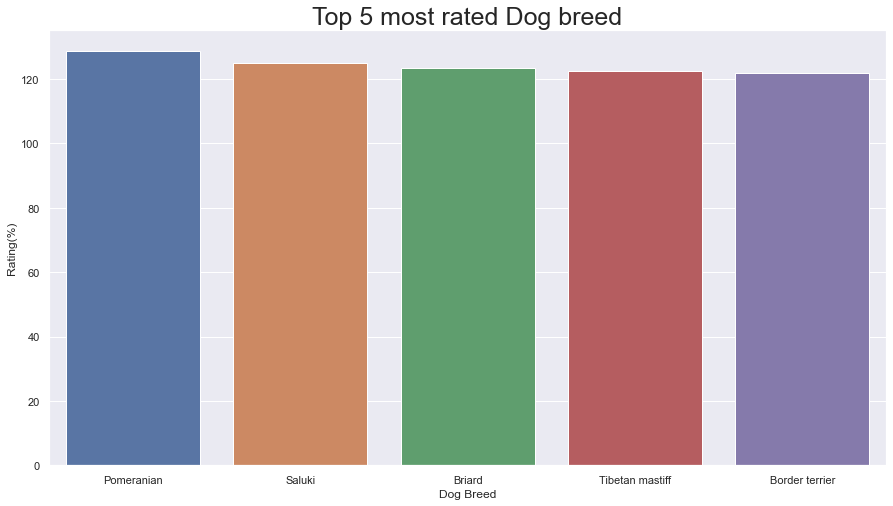

In [134]:
Barplot('Dog_breed','rating_percent',top_5,'Top 5 most rated Dog breed','Dog Breed','Rating(%)')

### Q2:  Association between rating, retweet count and favorite count.


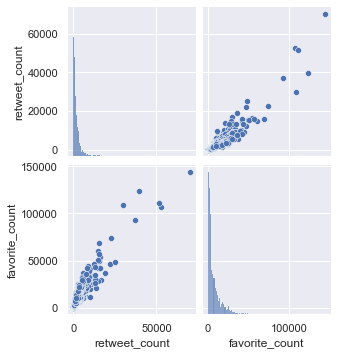

In [127]:
sns.pairplot(master_dataframe[['retweet_count','favorite_count']])
sns.set(rc = {'figure.figsize':(15,8)})
plt.show()

#### <code>H0: There is no Association between retweet count and favorite count</code>

#### <code>H1: There is  Association between retweet count and favorite count </code>

In [128]:
#Using pearson correlation.
pearsonr,pvalue = stats.pearsonr(master_dataframe['retweet_count'],master_dataframe['favorite_count'])

print(f'The pearson correlation value is {pearsonr}, and its cooresponding p-value is {pvalue}')

The pearson correlation value is 0.9273665375420046, and its cooresponding p-value is 0.0


> From the result above, our Pairplot shows that as the retweet count increases so also the favorite count increases, and the relationship between them is linear,from the test  we get a pearson correlation value of approximately 0.93, which implies that there is a strong positive association between them,we also get a p-value of 0.00 ,choosing level of significance to be 0.05 , since p-value is less than the Level of Significance i.e 0.00 < 0.05, we there reject the null hypothesis and conclude that the Pearson correlation value of approximately 0.93 is Statistically Significant.

### Q3:  Dog breeds with the Highest Retweet

In [129]:
dog_retweet = pd.DataFrame(master_dataframe.groupby('Dog_breed')['retweet_count'].mean()).sort_values(by = 'retweet_count',
                                                                                        ascending = False).head(5)

In [130]:
dog_retweet.retweet_count = dog_retweet.retweet_count.astype(int)
dog_retweet.retweet_count

Dog_breed
Flat-coated retriever    5300
Afghan hound             4765
English springer         4641
Eskimo dog               4390
Saluki                   4113
Name: retweet_count, dtype: int32

### Q4:  Top 10  least Rated Dog Breeds

In [131]:
least_10 = pd.DataFrame(master_dataframe.groupby('Dog_breed')['rating_percent'].mean()).sort_values(by = 'rating_percent',
                                                                                         ascending = False).tail(10)
least_10.reset_index(inplace = True)

In [132]:
least_10.rating_percent = least_10.rating_percent.apply(lambda x: format(x,'.2f'))

In [133]:
least_10

,Dog_breed,rating_percent
0,Tibetan terrier,92.50
1,Dalmatian,92.14
2,Soft-coated wheaten terrier,90.91
3,Scotch terrier,90.00
4,Norwich terrier,90.00
5,Walker hound,90.00
6,Welsh springer spaniel,90.00
7,Ibizan hound,90.00
8,Miniature schnauzer,83.33
9,Japanese spaniel,50.00
